In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer



import plotly.express as px
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)


Populating the interactive namespace from numpy and matplotlib


In [9]:
listings_df = pd.read_csv('listingsFinal.csv')
listings_df

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ian,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60.0,4,118,2018-10-28,3.76,4,141
1,1,2695,Prenzlauer Berg close to Mauerpark,2986,Michael,Pankow,Prenzlauer Berg Nordwest,52.548513,13.404553,Private room,17.0,2,6,2018-10-01,1.42,1,0
2,2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.534996,13.417579,Entire home/apt,90.0,62,143,2017-03-20,1.25,1,220
3,3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.498855,13.349065,Private room,26.0,5,25,2018-08-16,0.39,1,297
4,4,7071,BrightRoom with sunny greenview!,17391,Bright,Pankow,Helmholtzplatz,52.543157,13.415091,Private room,42.0,2,197,2018-11-04,1.75,1,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22547,22547,29856708,Cozy Apartment right in the center of Berlin,87555909,Ulisses,Mitte,Brunnenstr. Süd,52.533865,13.400731,Entire home/apt,60.0,2,0,NaN,NaN,1,314
22548,22548,29857108,Altbau/ Schöneberger Kiez / Schlafsofa,67537363,Jörg,Tempelhof - Schöneberg,Schöneberg-Nord,52.496211,13.341738,Shared room,20.0,1,0,NaN,NaN,6,78
22549,22549,29864272,Artists loft with garden in the center of Berlin,3146923,Martin,Pankow,Prenzlauer Berg Südwest,52.531800,13.411999,Entire home/apt,85.0,3,0,NaN,NaN,2,15
22550,22550,29866805,Room for two with private shower / WC,36961901,Arte Luise,Mitte,Alexanderplatz,52.520802,13.378688,Private room,99.0,1,0,NaN,NaN,3,6


In [10]:
missing_values = listings_df.isna().sum()/len(listings_df)*100
missing_values

Unnamed: 0                         0.000000
id                                 0.000000
name                               0.261618
host_id                            0.000000
host_name                          0.115289
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              2.208230
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       17.328840
reviews_per_month                 17.355445
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

In [11]:
new = listings_df.dropna(axis=0,subset=['name','host_name'])

In [12]:
missing_values1 = new.isna().sum()/len(new)*100
missing_values1

Unnamed: 0                         0.000000
id                                 0.000000
name                               0.000000
host_id                            0.000000
host_name                          0.000000
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              2.203231
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       17.243068
reviews_per_month                 17.269773
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

In [13]:
listings_df_removeoutliers = new

maxval = new["price"].max()
print(maxval)

minval = new["price"].min()
print(minval)

# Removing Outliers from weight using IQR
Q1 = listings_df_removeoutliers["price"].quantile(0.25)
Q3 = listings_df_removeoutliers["price"].quantile(0.75)
IQR = Q3-Q1
lowqe_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lowqe_bound, upper_bound)


athletes_df_removeoutliers = listings_df_removeoutliers[~(
    (listings_df_removeoutliers["price"] < lowqe_bound) | (listings_df_removeoutliers["price"] > upper_bound))]
listings_df_removeoutliers.shape

8600.0
0.0
-30.0 130.0


(22467, 17)

In [14]:
listings_df_removeoutliers2 = listings_df_removeoutliers

maxval = listings_df_removeoutliers2["minimum_nights"].max()
print(maxval)

minval = listings_df_removeoutliers2["minimum_nights"].min()
print(minval)

# Removing Outliers from weight using IQR
Q1 = listings_df_removeoutliers2["minimum_nights"].quantile(0.25)
Q3 = listings_df_removeoutliers2["minimum_nights"].quantile(0.75)
IQR = Q3-Q1
lowqe_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lowqe_bound, upper_bound)


athletes_df_removeoutliers2 = listings_df_removeoutliers2[~(
    (listings_df_removeoutliers2["minimum_nights"] < lowqe_bound) | (listings_df_removeoutliers2["minimum_nights"] > upper_bound))]
listings_df_removeoutliers2.shape

5000
1
-1.0 7.0


(22467, 17)

In [15]:
listings_df_imputed = listings_df_removeoutliers2


imp = IterativeImputer(missing_values=np.nan,
                       max_iter=20,tol=0.001)
imp.fit(listings_df_imputed[['price']])
listings_df_imputed['price'] = data=imp.transform(listings_df_imputed[['price']]).ravel()

<ipython-input-15-3970a399f5da>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_df_imputed['price'] = data=imp.transform(listings_df_imputed[['price']]).ravel()


In [16]:
missing_values2 = listings_df_imputed.isna().sum()/len(new)*100
missing_values2

Unnamed: 0                         0.000000
id                                 0.000000
name                               0.000000
host_id                            0.000000
host_name                          0.000000
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       17.243068
reviews_per_month                 17.269773
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

In [17]:
listings_df_imputed["last_review"] = listings_df_imputed["last_review"].fillna('Never')
listings_df_imputed["reviews_per_month"] = listings_df_imputed["reviews_per_month"].fillna('0')

<ipython-input-17-125d54c03ab7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_df_imputed["last_review"] = listings_df_imputed["last_review"].fillna('Never')
<ipython-input-17-125d54c03ab7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_df_imputed["reviews_per_month"] = listings_df_imputed["reviews_per_month"].fillna('0')


In [18]:
missing_values3 = listings_df_imputed.isna().sum()/len(new)*100
missing_values3

Unnamed: 0                        0.0
id                                0.0
name                              0.0
host_id                           0.0
host_name                         0.0
neighbourhood_group               0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
last_review                       0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
dtype: float64

In [19]:
listings_df_imputed

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ian,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60.0,4,118,2018-10-28,3.76,4,141
1,1,2695,Prenzlauer Berg close to Mauerpark,2986,Michael,Pankow,Prenzlauer Berg Nordwest,52.548513,13.404553,Private room,17.0,2,6,2018-10-01,1.42,1,0
2,2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.534996,13.417579,Entire home/apt,90.0,62,143,2017-03-20,1.25,1,220
3,3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.498855,13.349065,Private room,26.0,5,25,2018-08-16,0.39,1,297
4,4,7071,BrightRoom with sunny greenview!,17391,Bright,Pankow,Helmholtzplatz,52.543157,13.415091,Private room,42.0,2,197,2018-11-04,1.75,1,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22547,22547,29856708,Cozy Apartment right in the center of Berlin,87555909,Ulisses,Mitte,Brunnenstr. Süd,52.533865,13.400731,Entire home/apt,60.0,2,0,Never,0,1,314
22548,22548,29857108,Altbau/ Schöneberger Kiez / Schlafsofa,67537363,Jörg,Tempelhof - Schöneberg,Schöneberg-Nord,52.496211,13.341738,Shared room,20.0,1,0,Never,0,6,78
22549,22549,29864272,Artists loft with garden in the center of Berlin,3146923,Martin,Pankow,Prenzlauer Berg Südwest,52.531800,13.411999,Entire home/apt,85.0,3,0,Never,0,2,15
22550,22550,29866805,Room for two with private shower / WC,36961901,Arte Luise,Mitte,Alexanderplatz,52.520802,13.378688,Private room,99.0,1,0,Never,0,3,6


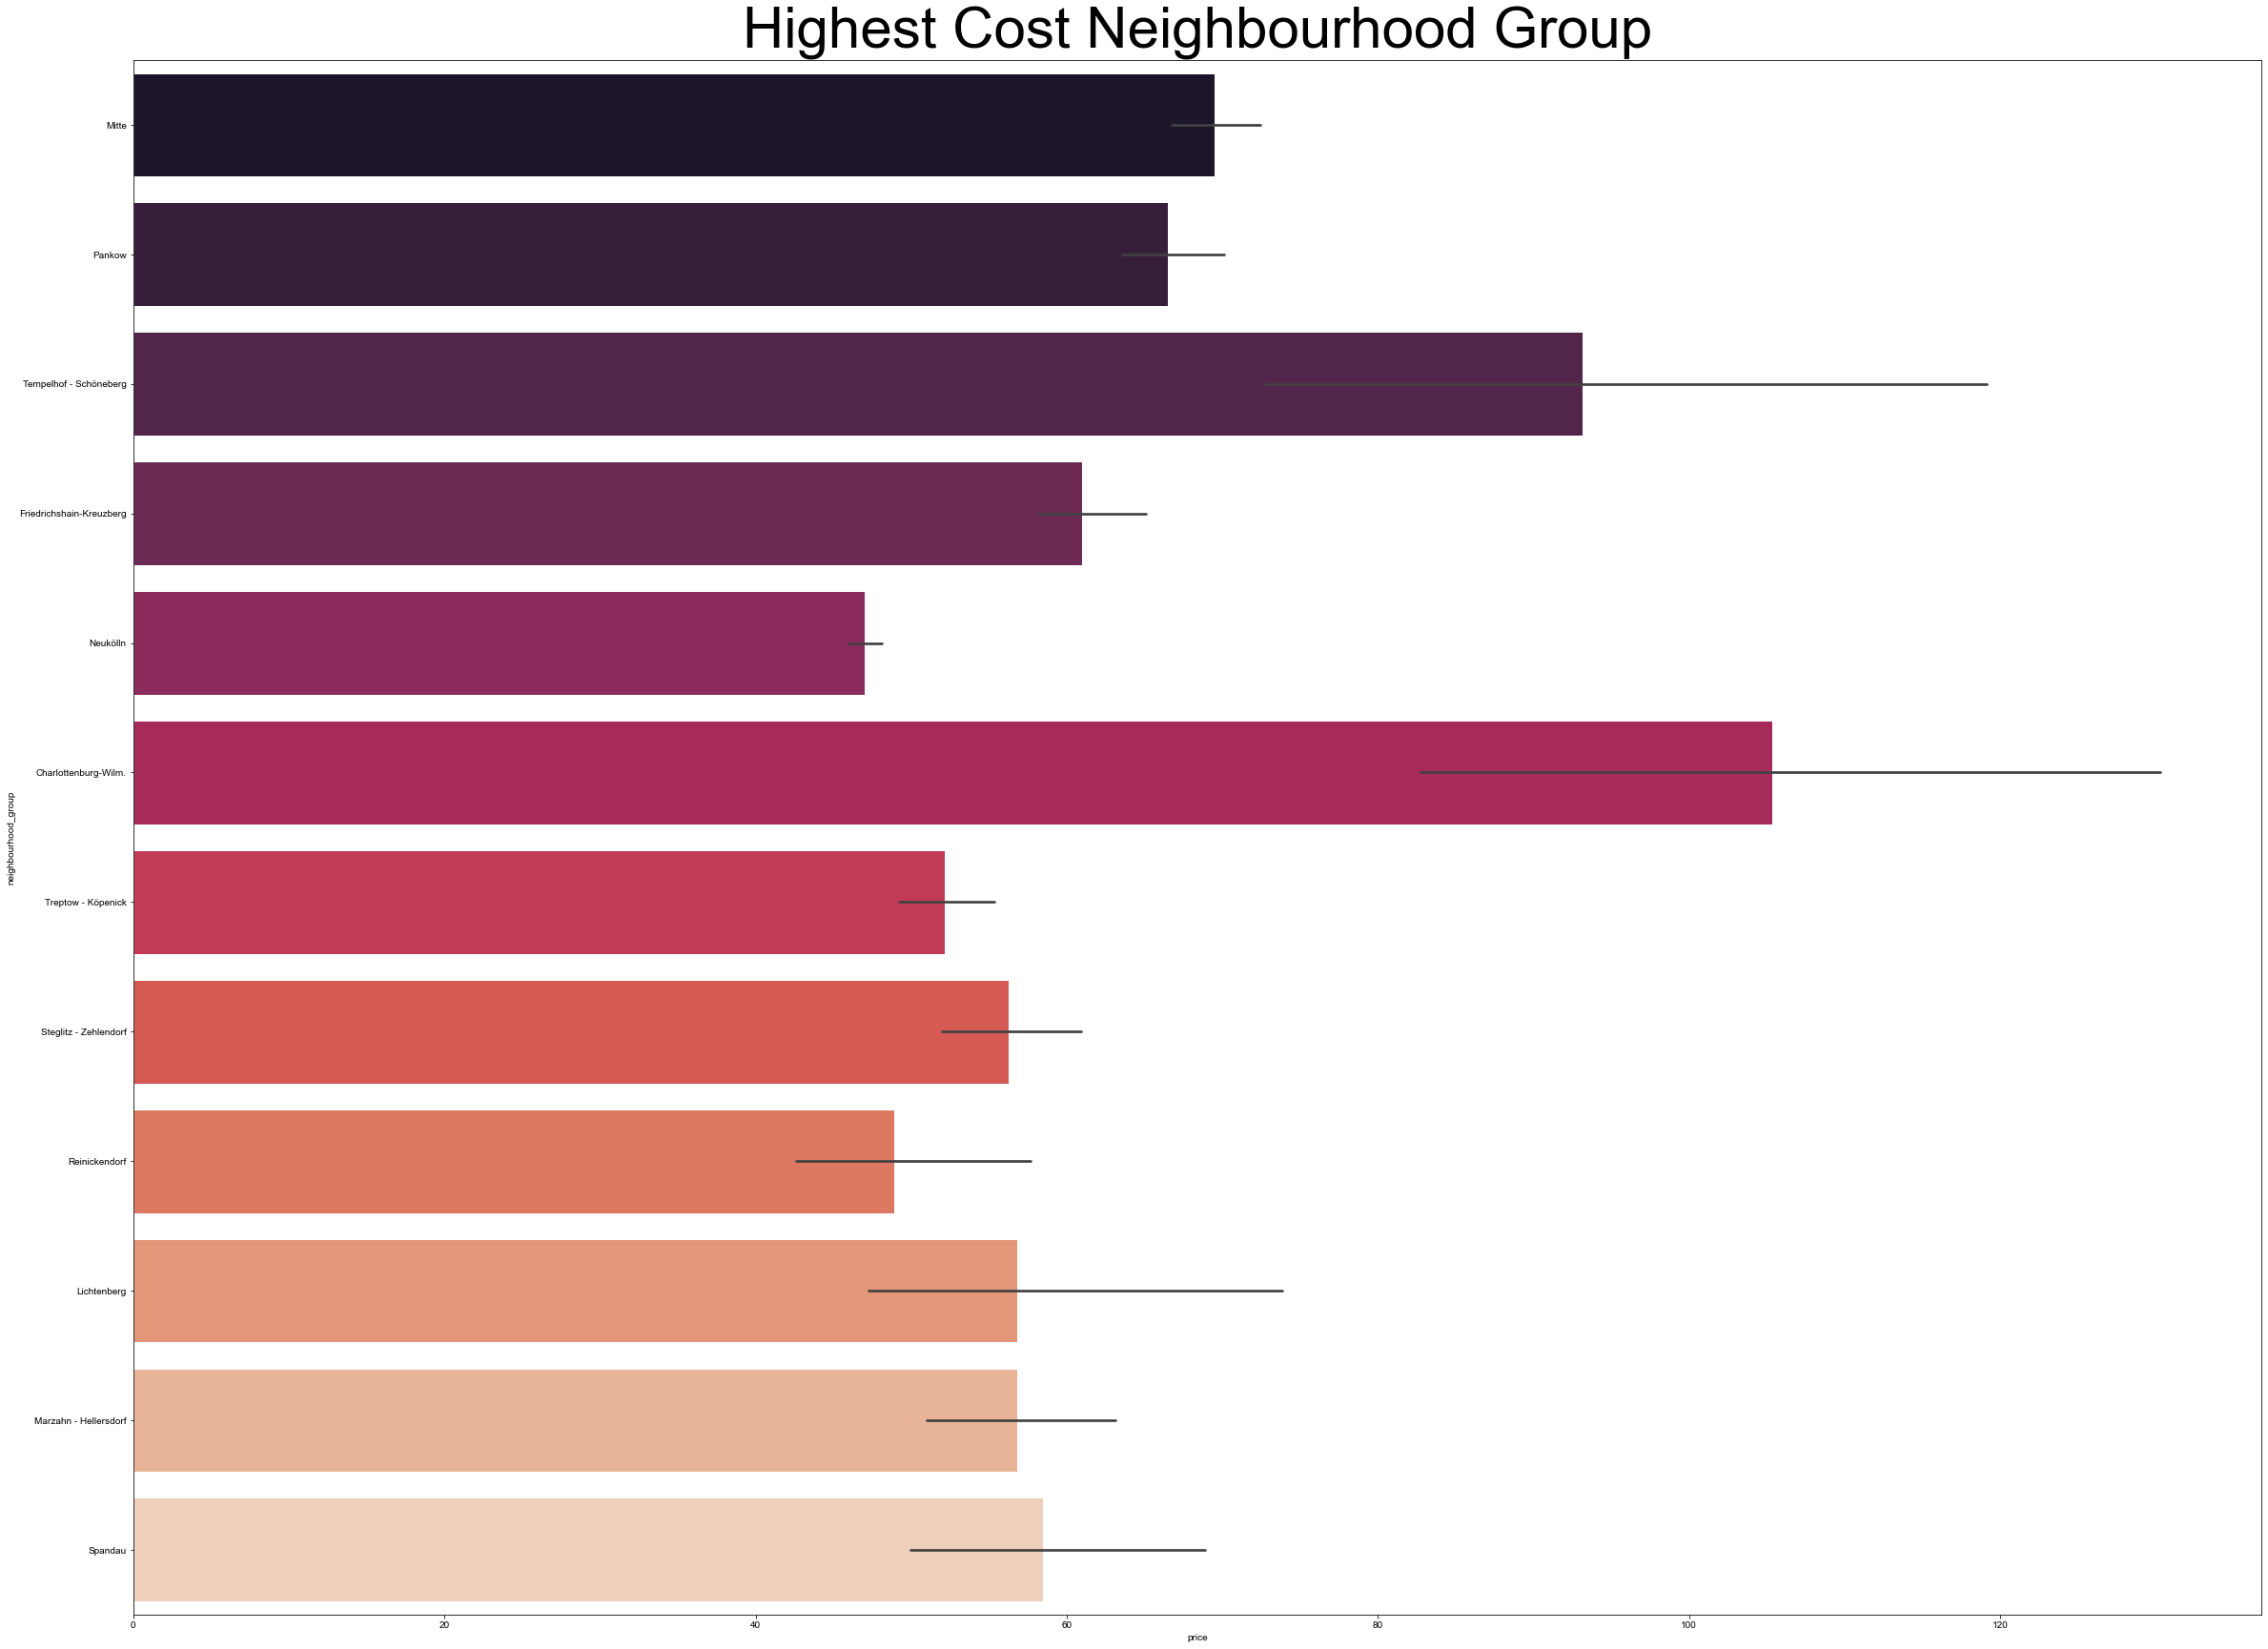

In [20]:
plt.figure(figsize=(40,30))
plt.title("Highest Cost Neighbourhood Group",fontsize = 60);
sns.set(font_scale = 7)
sns.barplot(y = "neighbourhood_group",x= "price",data= listings_df_imputed,palette="rocket")
plt.savefig("Highest_neighbourhood.jpg")


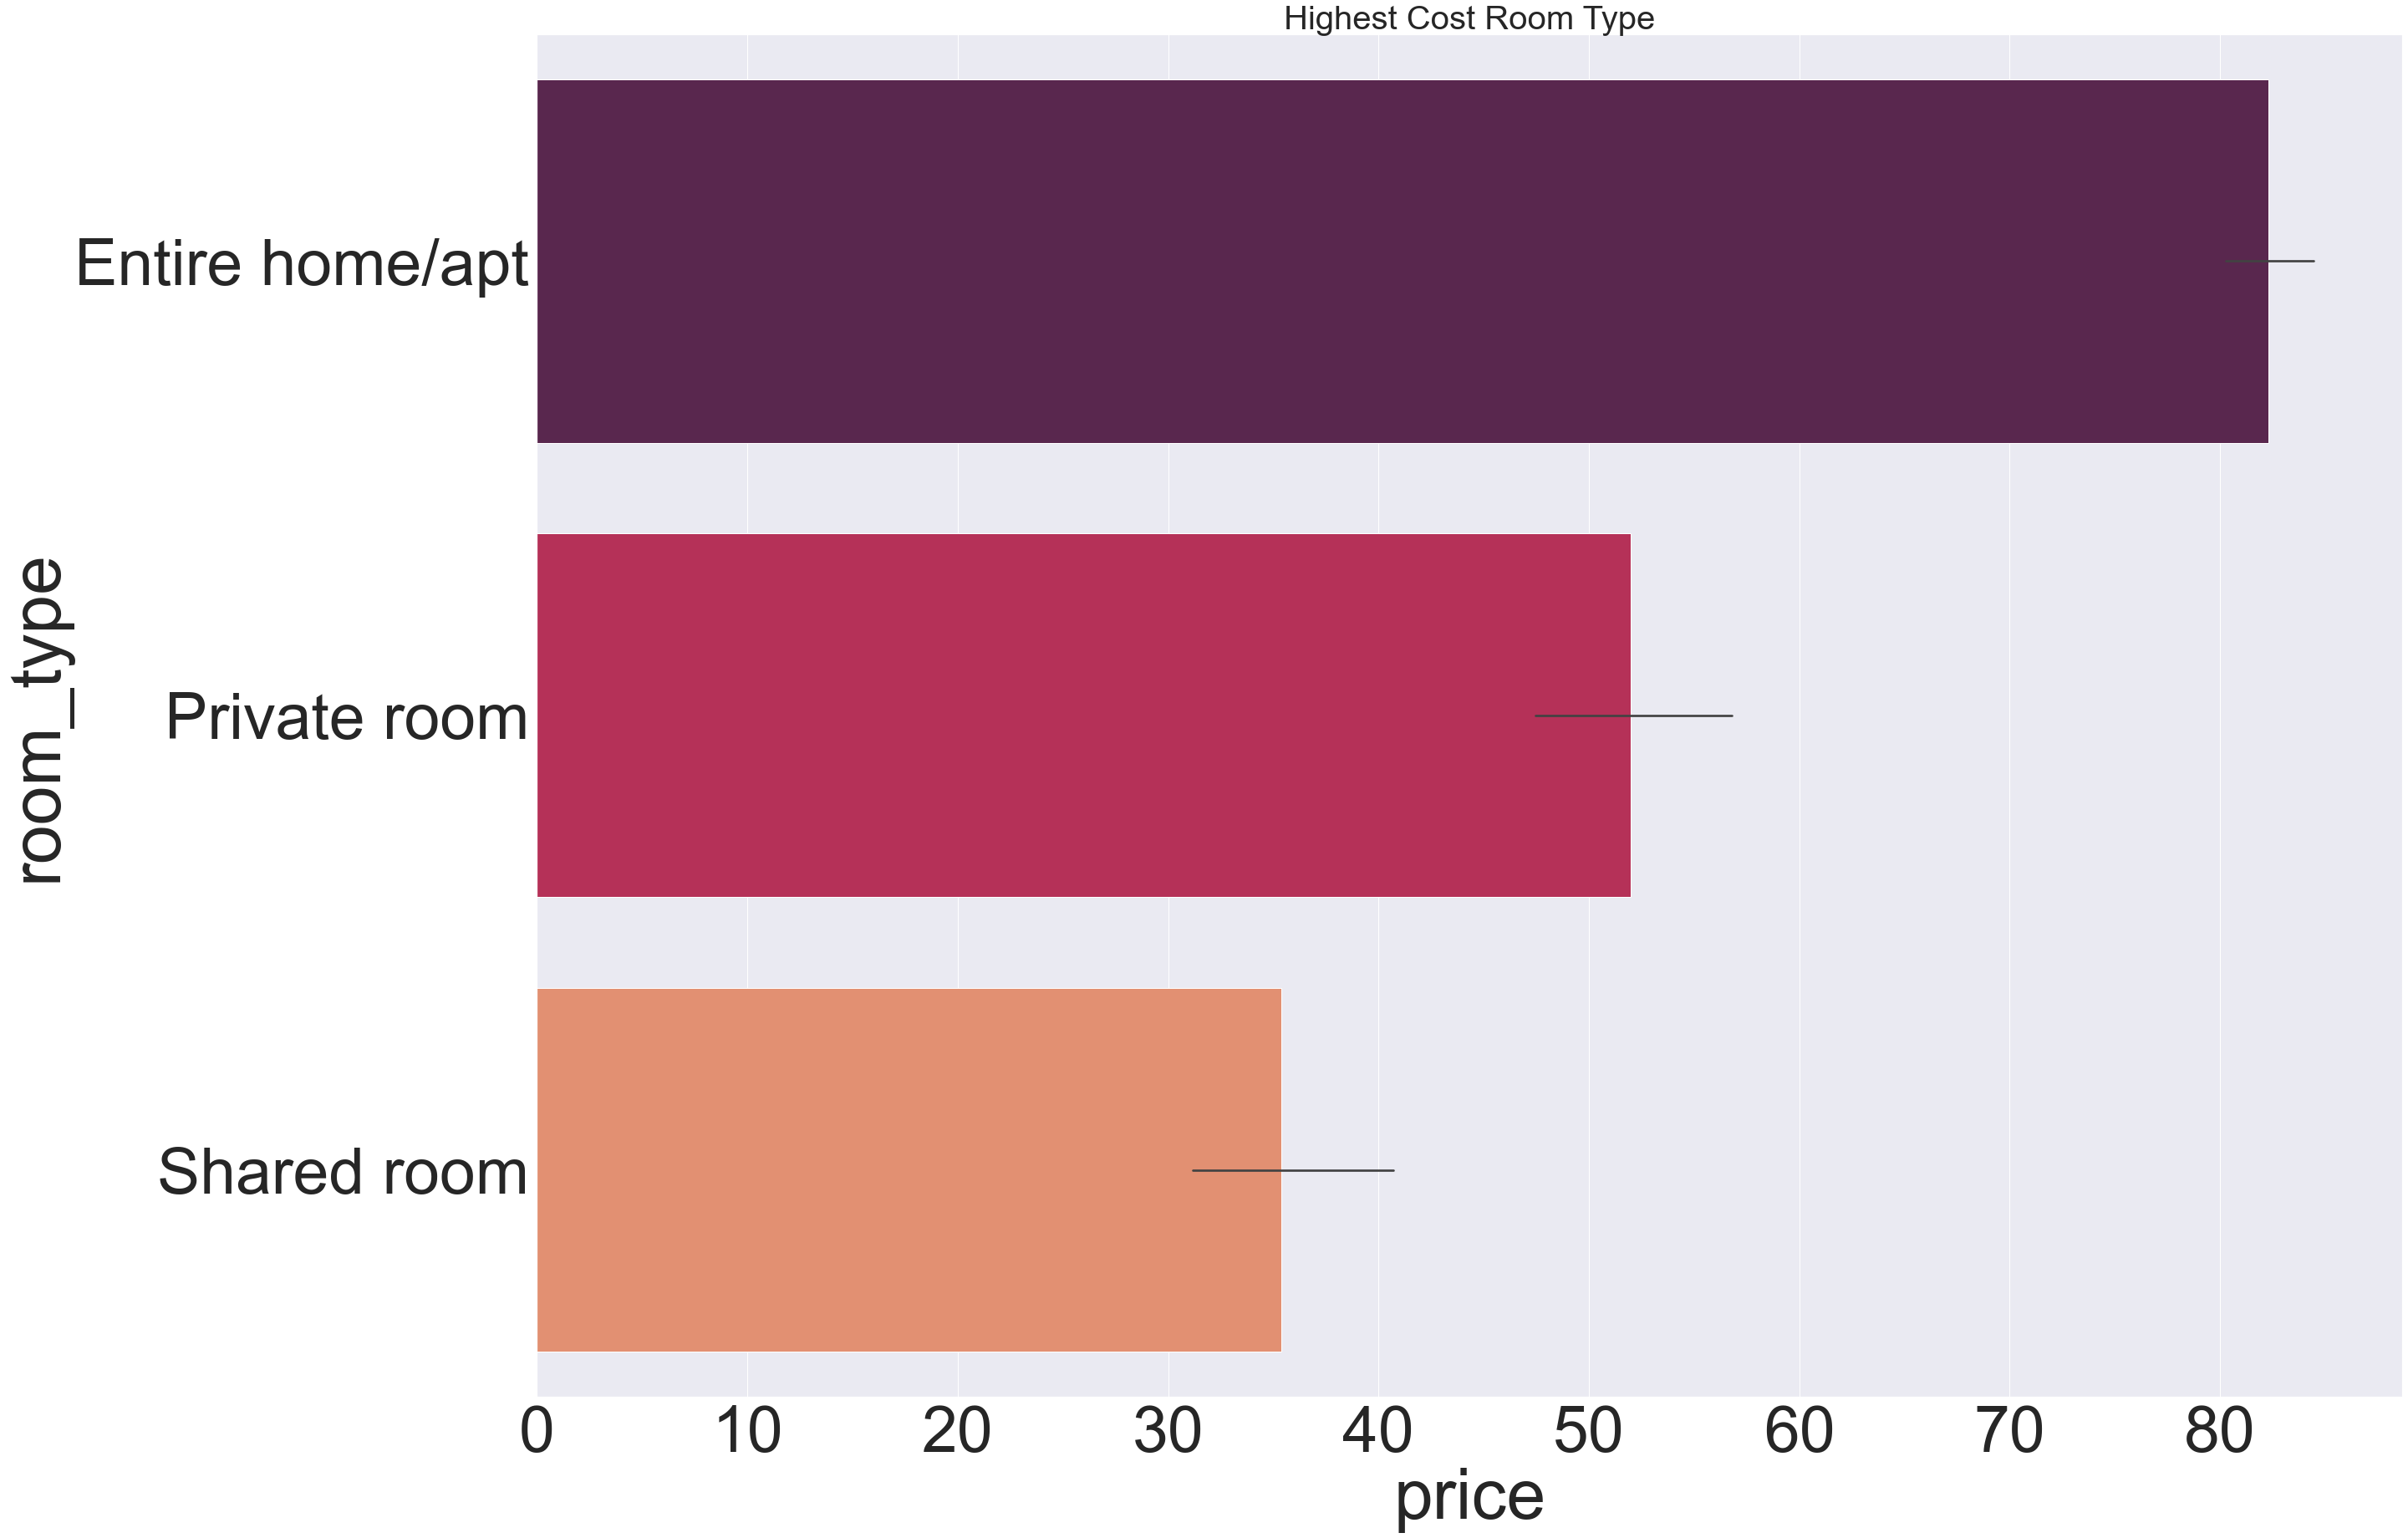

In [21]:
plt.figure(figsize=(40,30))
plt.title("Highest Cost Room Type",fontsize = 40);
sns.set(font_scale = 3)
sns.barplot(y = "room_type",x= "price",data= listings_df_imputed,palette="rocket")
plt.savefig("Highest_roomtype.jpg")


In [22]:
from bokeh.io import output_file,show,output_notebook,push_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource,HoverTool,BoxSelectTool
from bokeh.layouts import row,column,gridplot
from bokeh.models.widgets import Tabs,Panel
output_notebook()

Loading BokehJS ...

In [26]:
from bokeh.models import LinearColorMapper



# Search for color palette in bokeh


f = figure()

f.scatter(x=listings_df_imputed["neighbourhood"].index,y=listings_df_imputed["price"])
show(f)

In [3]:
listings_df = pd.read_csv('./taxi_trip_data.csv')

missing_values = listings_df.isna().sum()/len(listings_df)*100
missing_values

vendor_id              0.0
pickup_datetime        0.0
dropoff_datetime       0.0
passenger_count        0.0
trip_distance          0.0
rate_code              0.0
store_and_fwd_flag     0.0
payment_type           0.0
fare_amount            0.0
extra                  0.0
mta_tax                0.0
tip_amount             0.0
tolls_amount           0.0
imp_surcharge          0.0
total_amount           0.0
pickup_location_id     0.0
dropoff_location_id    0.0
dtype: float64